In [1]:
#Importing libraries
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [4]:
df = pd.DataFrame(online_retail.data.features )

# Display the first few rows of the DataFrame to check the structure of the data
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Display the dimensions (rows, columns) of the DataFrame
df.shape

(541909, 6)

In [6]:
# Display information about the DataFrame, such as column types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [7]:
# Drop rows where the 'CustomerID' is missing (NaN values)
df = df.dropna(subset=["CustomerID"])

# Convert the 'CustomerID' column from float (or object) to integer type
df.CustomerID = df.CustomerID.astype('int64')

<ipython-input-7-bdfadc3586f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CustomerID = df.CustomerID.astype('int64')


In [8]:
# Provide a statistical summary of numerical columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Filter out rows where 'Quantity' is less than or equal to zero
df = df[df["Quantity"] > 0]

In [10]:
# Check if there are any duplicate rows in the DataFrame
df.duplicated().any()

True

In [11]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(392657, 6)

In [13]:
# Print the number of unique values in each column of the DataFrame
print(df.nunique())

Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64


In [14]:
# Create a new DataFrame by selecting only the 'Country' and 'CustomerID' columns, dropping duplicate entries
filtered_data = df[["Country","CustomerID"]].drop_duplicates()
print(filtered_data.head())
filtered_data.shape

           Country  CustomerID
0   United Kingdom       17850
9   United Kingdom       13047
26          France       12583
46  United Kingdom       13748
65  United Kingdom       15100


(4347, 2)

<Axes: xlabel='Country'>

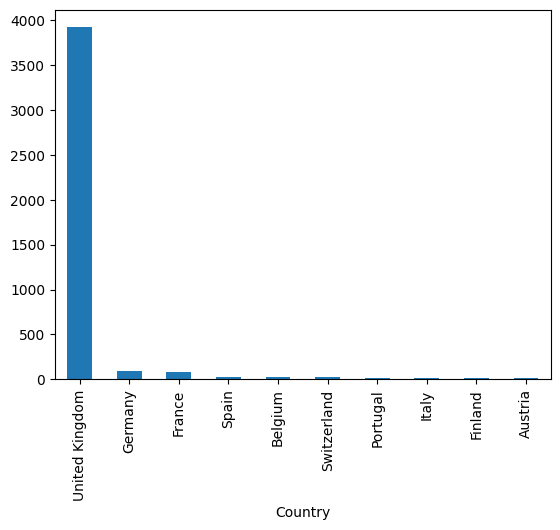

In [15]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [16]:
# Filter the dataset to include only transactions made in the United Kingdom
uk_data = df[df["Country"] == "United Kingdom"]
uk_data = df[df["Country"] == "United Kingdom"]
uk_data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [17]:
print(uk_data.nunique())

Description     3844
Quantity         294
InvoiceDate    15615
UnitPrice        403
CustomerID      3921
Country            1
dtype: int64


In [20]:
# Select relevant columns for further analysis
uk_data = uk_data[["CustomerID","InvoiceDate","Quantity","UnitPrice"]]

# Create a new column 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice'
uk_data["TotalPrice"] = uk_data["Quantity"] * uk_data["UnitPrice"]

# Convert the 'InvoiceDate' column to datetime format for easier time-based analysis
# The original format string was incorrect. Changed '%y' to '%Y' to handle the full year format.
uk_data["InvoiceDate"] = pd.to_datetime(uk_data['InvoiceDate'], format="%m/%d/%Y %H:%M")
uk_data.head()

,CustomerID,InvoiceDate,Quantity,UnitPrice,TotalPrice
0,17850,2010-12-01 08:26:00,6,2.55,15.30
1,17850,2010-12-01 08:26:00,6,3.39,20.34
2,17850,2010-12-01 08:26:00,8,2.75,22.00
3,17850,2010-12-01 08:26:00,6,3.39,20.34
4,17850,2010-12-01 08:26:00,6,3.39,20.34


In [21]:
#Getting the time at the moment
present_time = datetime.now()
present_time

datetime.datetime(2024, 11, 19, 18, 29, 24, 834697)

In [25]:
# Group the data by 'CustomerID' and calculate Recency, Frequency, and Monetary value for each customer
# Use 'InvoiceDate' for Recency, and a different column/method for Frequency
rfm = uk_data.groupby("CustomerID").agg({
    "InvoiceDate": lambda date: (present_time - date.max()).days,  # Recency: Days since last purchase
    "CustomerID": lambda num: len(num),  # Frequency: Number of purchases
                                      #  using CustomerID since it appears for every transaction/Invoice
                                      # Alternatively, count unique InvoiceNo or InvoiceDate if present in 'uk_data'
    "TotalPrice": lambda price: price.sum()  # Monetary: Total spending
})

rfm.head()

# Rename the columns to 'Recency', 'Frequency', 'Monetary'
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,5054,1,77183.60
12747,4731,103,4196.01
12748,4729,4413,33053.19
12749,4732,199,4090.88
12820,4732,59,942.34


In [23]:
# Group the data by 'CustomerID' and calculate Recency, Frequency, and Monetary value for each customer
# Replace 'InvoiceNo' with 'InvoiceDate' to calculate frequency based on the number of unique invoice dates
rfm = uk_data.groupby("CustomerID").agg({"InvoiceDate": lambda date: (present_time - date.max()).days,
                                          "InvoiceDate": lambda num: len(num),  # Using InvoiceDate for frequency calculation
                                          "TotalPrice": lambda price: price.sum()})
rfm.head()

# Rename the 'InvoiceDate' column to 'Frequency' after aggregation
rfm.rename(columns={"InvoiceDate": "Frequency"}, inplace=True)
rfm.head()

,Frequency,TotalPrice
CustomerID,,
12346,1,77183.60
12747,103,4196.01
12748,4413,33053.19
12749,199,4090.88
12820,59,942.34


In [26]:
# Create quartiles for Recency, assigning lower values to more recent customers (1=most recent)
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])

# Create quartiles for Frequency, assigning higher values to more frequent customers (1=most frequent)
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])

# Create quartiles for Monetary, assigning higher values to higher spenders (1=highest spending)
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346,5054,1,77183.60,4,4,1
12747,4731,103,4196.01,1,1,1
12748,4729,4413,33053.19,1,1,1
12749,4732,199,4090.88,1,1,1
12820,4732,59,942.34,1,2,2


In [27]:
# Combine the quartile rankings into a single RFM score (Recency, Frequency, Monetary)
rfm["RFM_Score"] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346,5054,1,77183.60,4,4,1,441
12747,4731,103,4196.01,1,1,1,111
12748,4729,4413,33053.19,1,1,1,111
12749,4732,199,4090.88,1,1,1,111
12820,4732,59,942.34,1,2,2,122


In [28]:
# Filter customers who have the best RFM score (111) and display the top spenders in descending order of 'Monetary'
rfm[rfm['RFM_Score']=='111'].sort_values('Monetary',ascending=False).head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102,4729,430,258741.30,1,1,1,111
17450,4737,336,194390.79,1,1,1,111
17511,4731,963,91062.38,1,1,1,111
16684,4733,277,66653.56,1,1,1,111
14096,4733,5111,65164.79,1,1,1,111


In [29]:
# Create RFM segments based on the RFM score
rfm["RFM_Score"] = rfm['RFM_Score'].astype(int)
segment_labels = ['High-Value', 'Mid-Value','Low-Value']
rfm['Value_Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,Value_Segment
CustomerID,,,,,,,,
12346,5054,1,77183.60,4,4,1,441,Low-Value
12747,4731,103,4196.01,1,1,1,111,High-Value
12748,4729,4413,33053.19,1,1,1,111,High-Value
12749,4732,199,4090.88,1,1,1,111,High-Value
12820,4732,59,942.34,1,2,2,122,High-Value


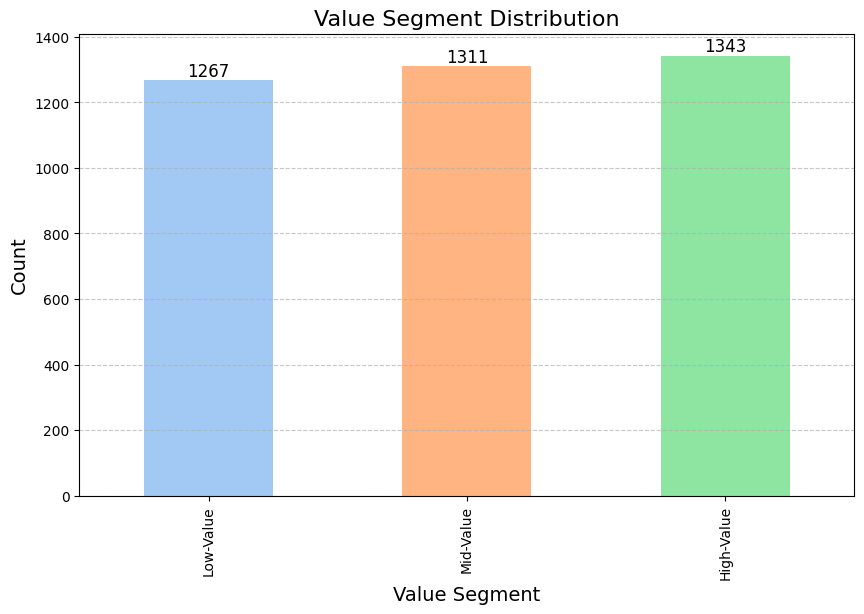

In [31]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
ax = rfm.Value_Segment.value_counts().sort_values().plot(kind='bar', color=sns.color_palette("pastel"))

# Customize the plot
ax.set_title('Value Segment Distribution', fontsize=16)  # Add a title with font size
ax.set_xlabel('Value Segment', fontsize=14)              # Add x-label with font size
ax.set_ylabel('Count', fontsize=14)                       # Add y-label with font size
ax.grid(axis='y', linestyle='--', alpha=0.7)             # Add gridlines for better readability

# Show value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

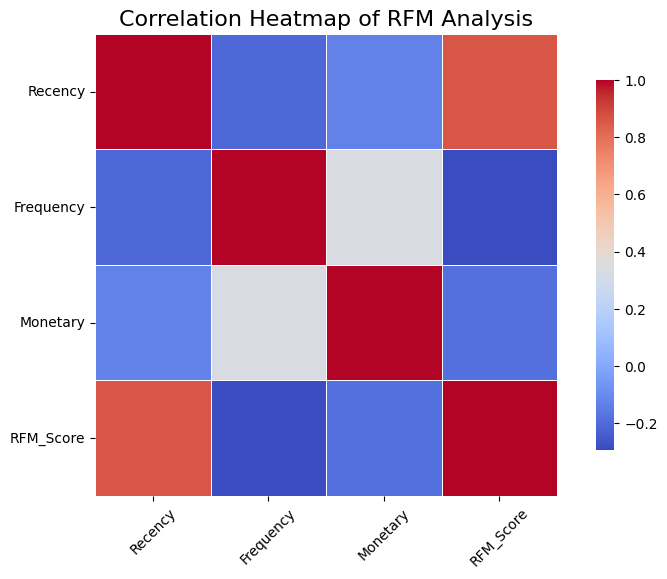

In [32]:
# Select relevant columns for correlation
columns_to_plot = ['Recency', 'Frequency', 'Monetary', 'RFM_Score']
correlation_matrix = rfm[columns_to_plot].corr()

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix,
            cmap='coolwarm',  # Color map
            square=True,  # Make cells square-shaped
            linewidths=0.5,  # Width of the lines separating cells
            cbar_kws={"shrink": .8})  # Shrink the color bar

# Add title and labels
plt.title('Correlation Heatmap of RFM Analysis', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Show the plot
plt.show()

The strong positive correlation between Recency and RFM_Score suggests that recent customers tend to have higher RFM scores.

In [34]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = rfm.groupby('Value_Segment')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['Value_Segment'],
    y=segment_scores['Recency'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['Value_Segment'],
    y=segment_scores['Frequency'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['Value_Segment'],
    y=segment_scores['Monetary'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

# Show the plot
fig.show()

<ipython-input-34-0916435b966d>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



High-Value customers are characterized by high recent purchases, frequent buying behavior, and significant spending, making them essential for the business.

Mid-Value customers have moderate engagement but could be potential targets for strategies to convert them into High-Value customers.

Low-Value customers show signs of disengagement, making them a focus for re-engagement strategies to boost their purchasing behavior.